In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
print(boston_dataset.keys())
#data is information of various houses
#target= prices of houses
#feature names= names of features

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
#fature variables aka independent variables.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = boston_dataset.target
#MEDV is our target variable

# Data Preprocessing

In [7]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#EDA Exploratory Data Analysis

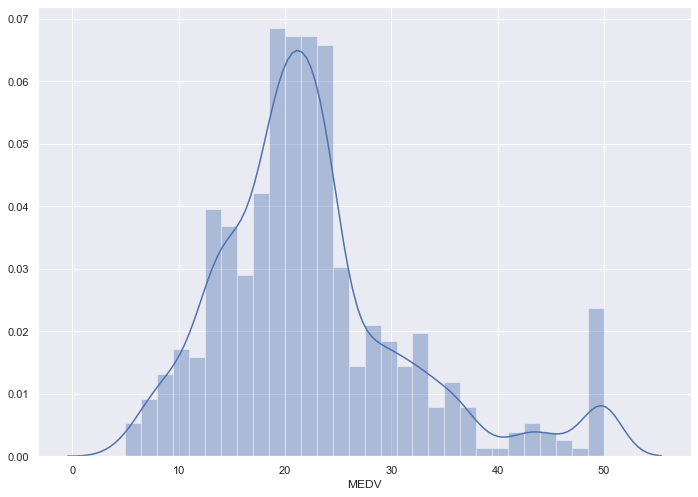

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins = 30)
plt.show()

<AxesSubplot:>

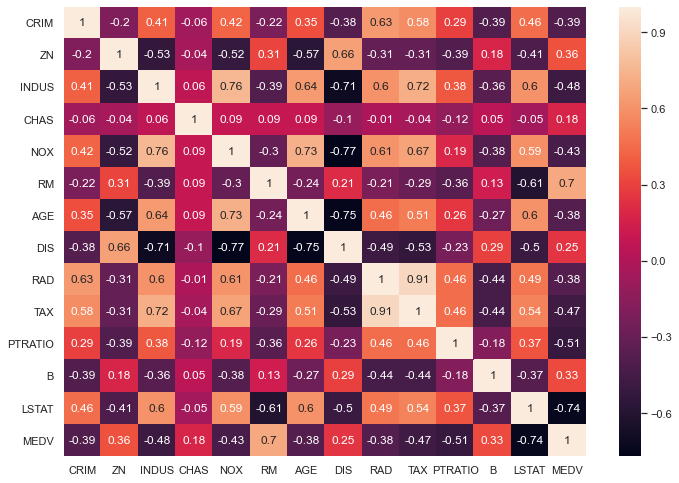

In [10]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
#the correlation co-efficient ranges from -1 to 1

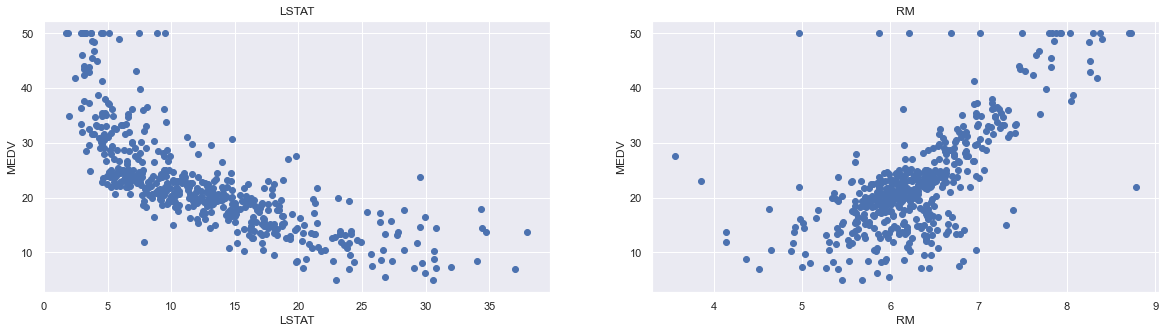

In [11]:
#The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
#The prices tend to decrease with an increase in LSTAT. Though it doesn't look to be following exactly linear.

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
# MY ADDITIONS TO EDA

In [13]:
# basic descriptive statistics for each variable
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# view variable types and counts 
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
#view number of unique entries for each variable
print(boston.nunique())

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


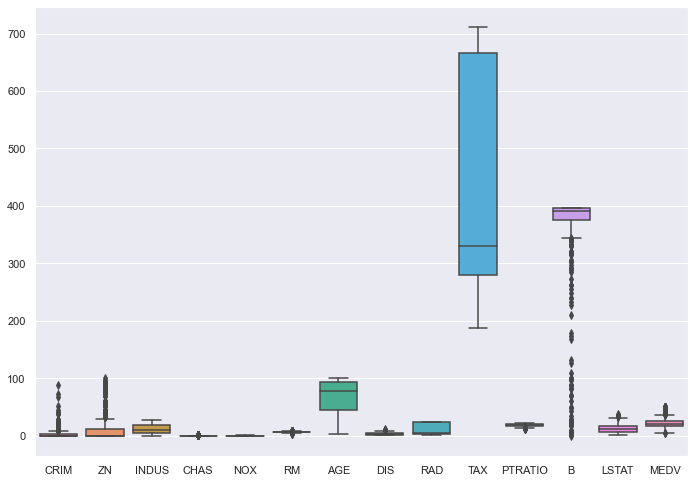

In [16]:
# boxplots to see relative magnitudes of variables and determine need for rescaling
ax = sns.boxplot(data=boston)

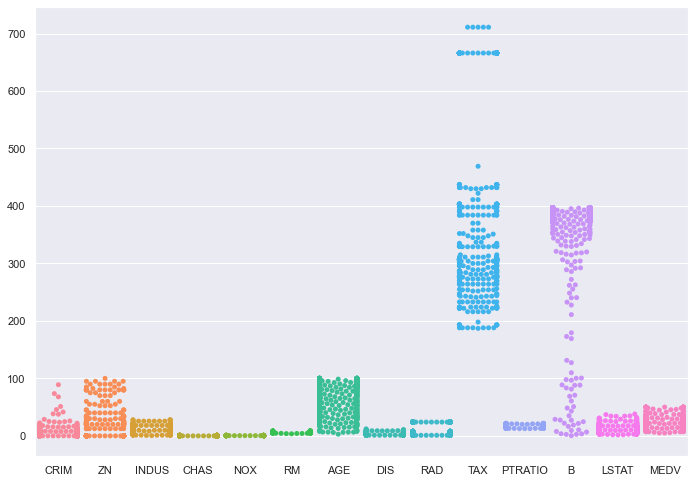

In [17]:
# swarmplot to better understand boxplot
# very interesting distribution for TAX.  Most other variables are fairly unremarkable,
# except B which is odd.
ax = sns.swarmplot(data=boston)

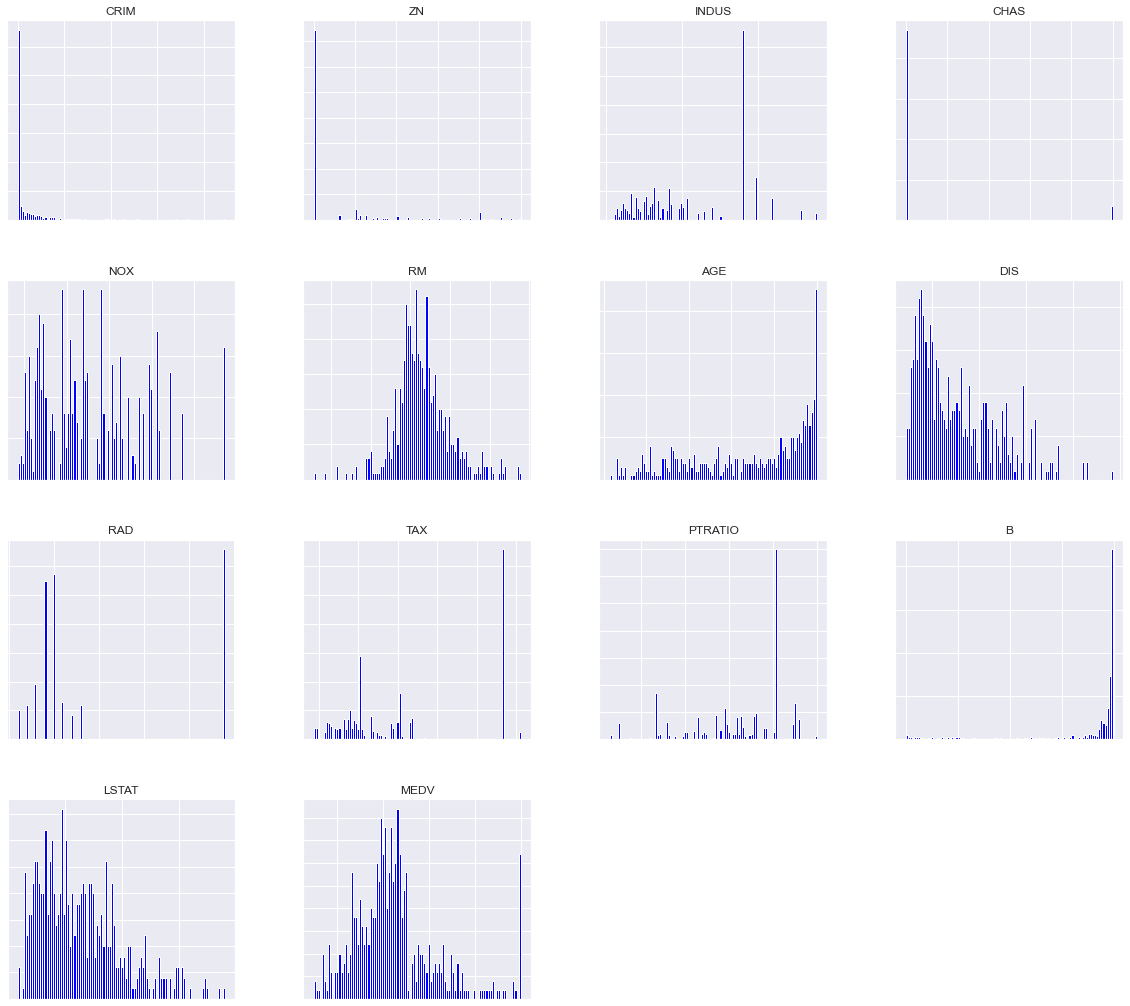

In [31]:
# View distribution of all input and output variables
ax=boston.hist(bins=100,figsize=(20,18),color='blue')
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

plt.show()

In [18]:
# ORIGINAL EXAMPLE (NO CHANGES MADE TO DATA SET)


In [19]:
#np.c_ is to concatenate the LSTAT and RM columns
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


In [32]:
# PLOT TRAIN AND TEST SCATTERPLOTS
#

In [37]:
Y_test.describe()

count    102.000000
mean      22.081373
std        8.892078
min        7.000000
25%       16.900000
50%       21.300000
75%       24.775000
max       50.000000
Name: MEDV, dtype: float64

In [38]:
X_test.describe()

,LSTAT,RM
count,102.000000,102.000000
mean,13.346275,6.269500
std,7.529299,0.743105
min,1.980000,4.519000
25%,7.480000,5.877250
50%,12.195000,6.200500
75%,16.702500,6.571500
max,36.980000,8.398000


In [39]:
Y_train.describe()

count    404.000000
mean      22.646782
std        9.279809
min        5.000000
25%       17.075000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [40]:
X_train.describe()

,LSTAT,RM
count,404.000000,404.000000
mean,12.478045,6.288455
std,7.038575,0.692931
min,1.730000,3.561000
25%,6.840000,5.888000
50%,11.160000,6.209000
75%,16.992500,6.629250
max,37.970000,8.780000


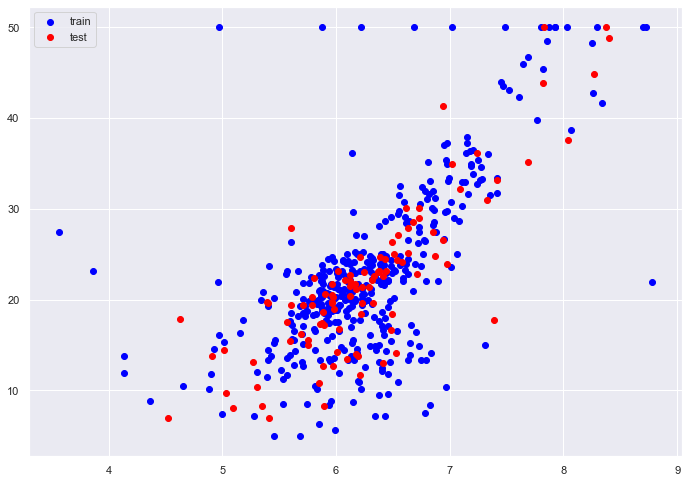

In [48]:
# Plot of RM vs Y
plt.scatter(X_train["RM"],Y_train,color="blue",label="train")
plt.scatter(X_test["RM"],Y_test,color="red",label="test")
plt.legend()
plt.show()

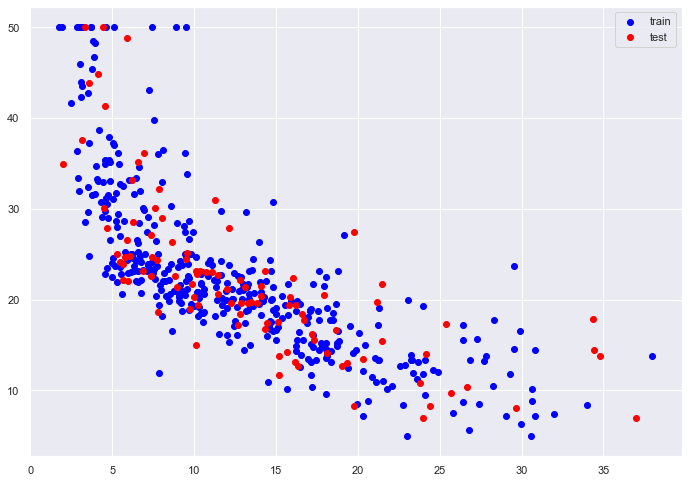

In [49]:
# Plot of LSTAT vs Y
plt.scatter(X_train["LSTAT"],Y_train,color="blue",label="train")
plt.scatter(X_test["LSTAT"],Y_test,color="red",label="test")
plt.legend()
plt.show()